In [45]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import joblib

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

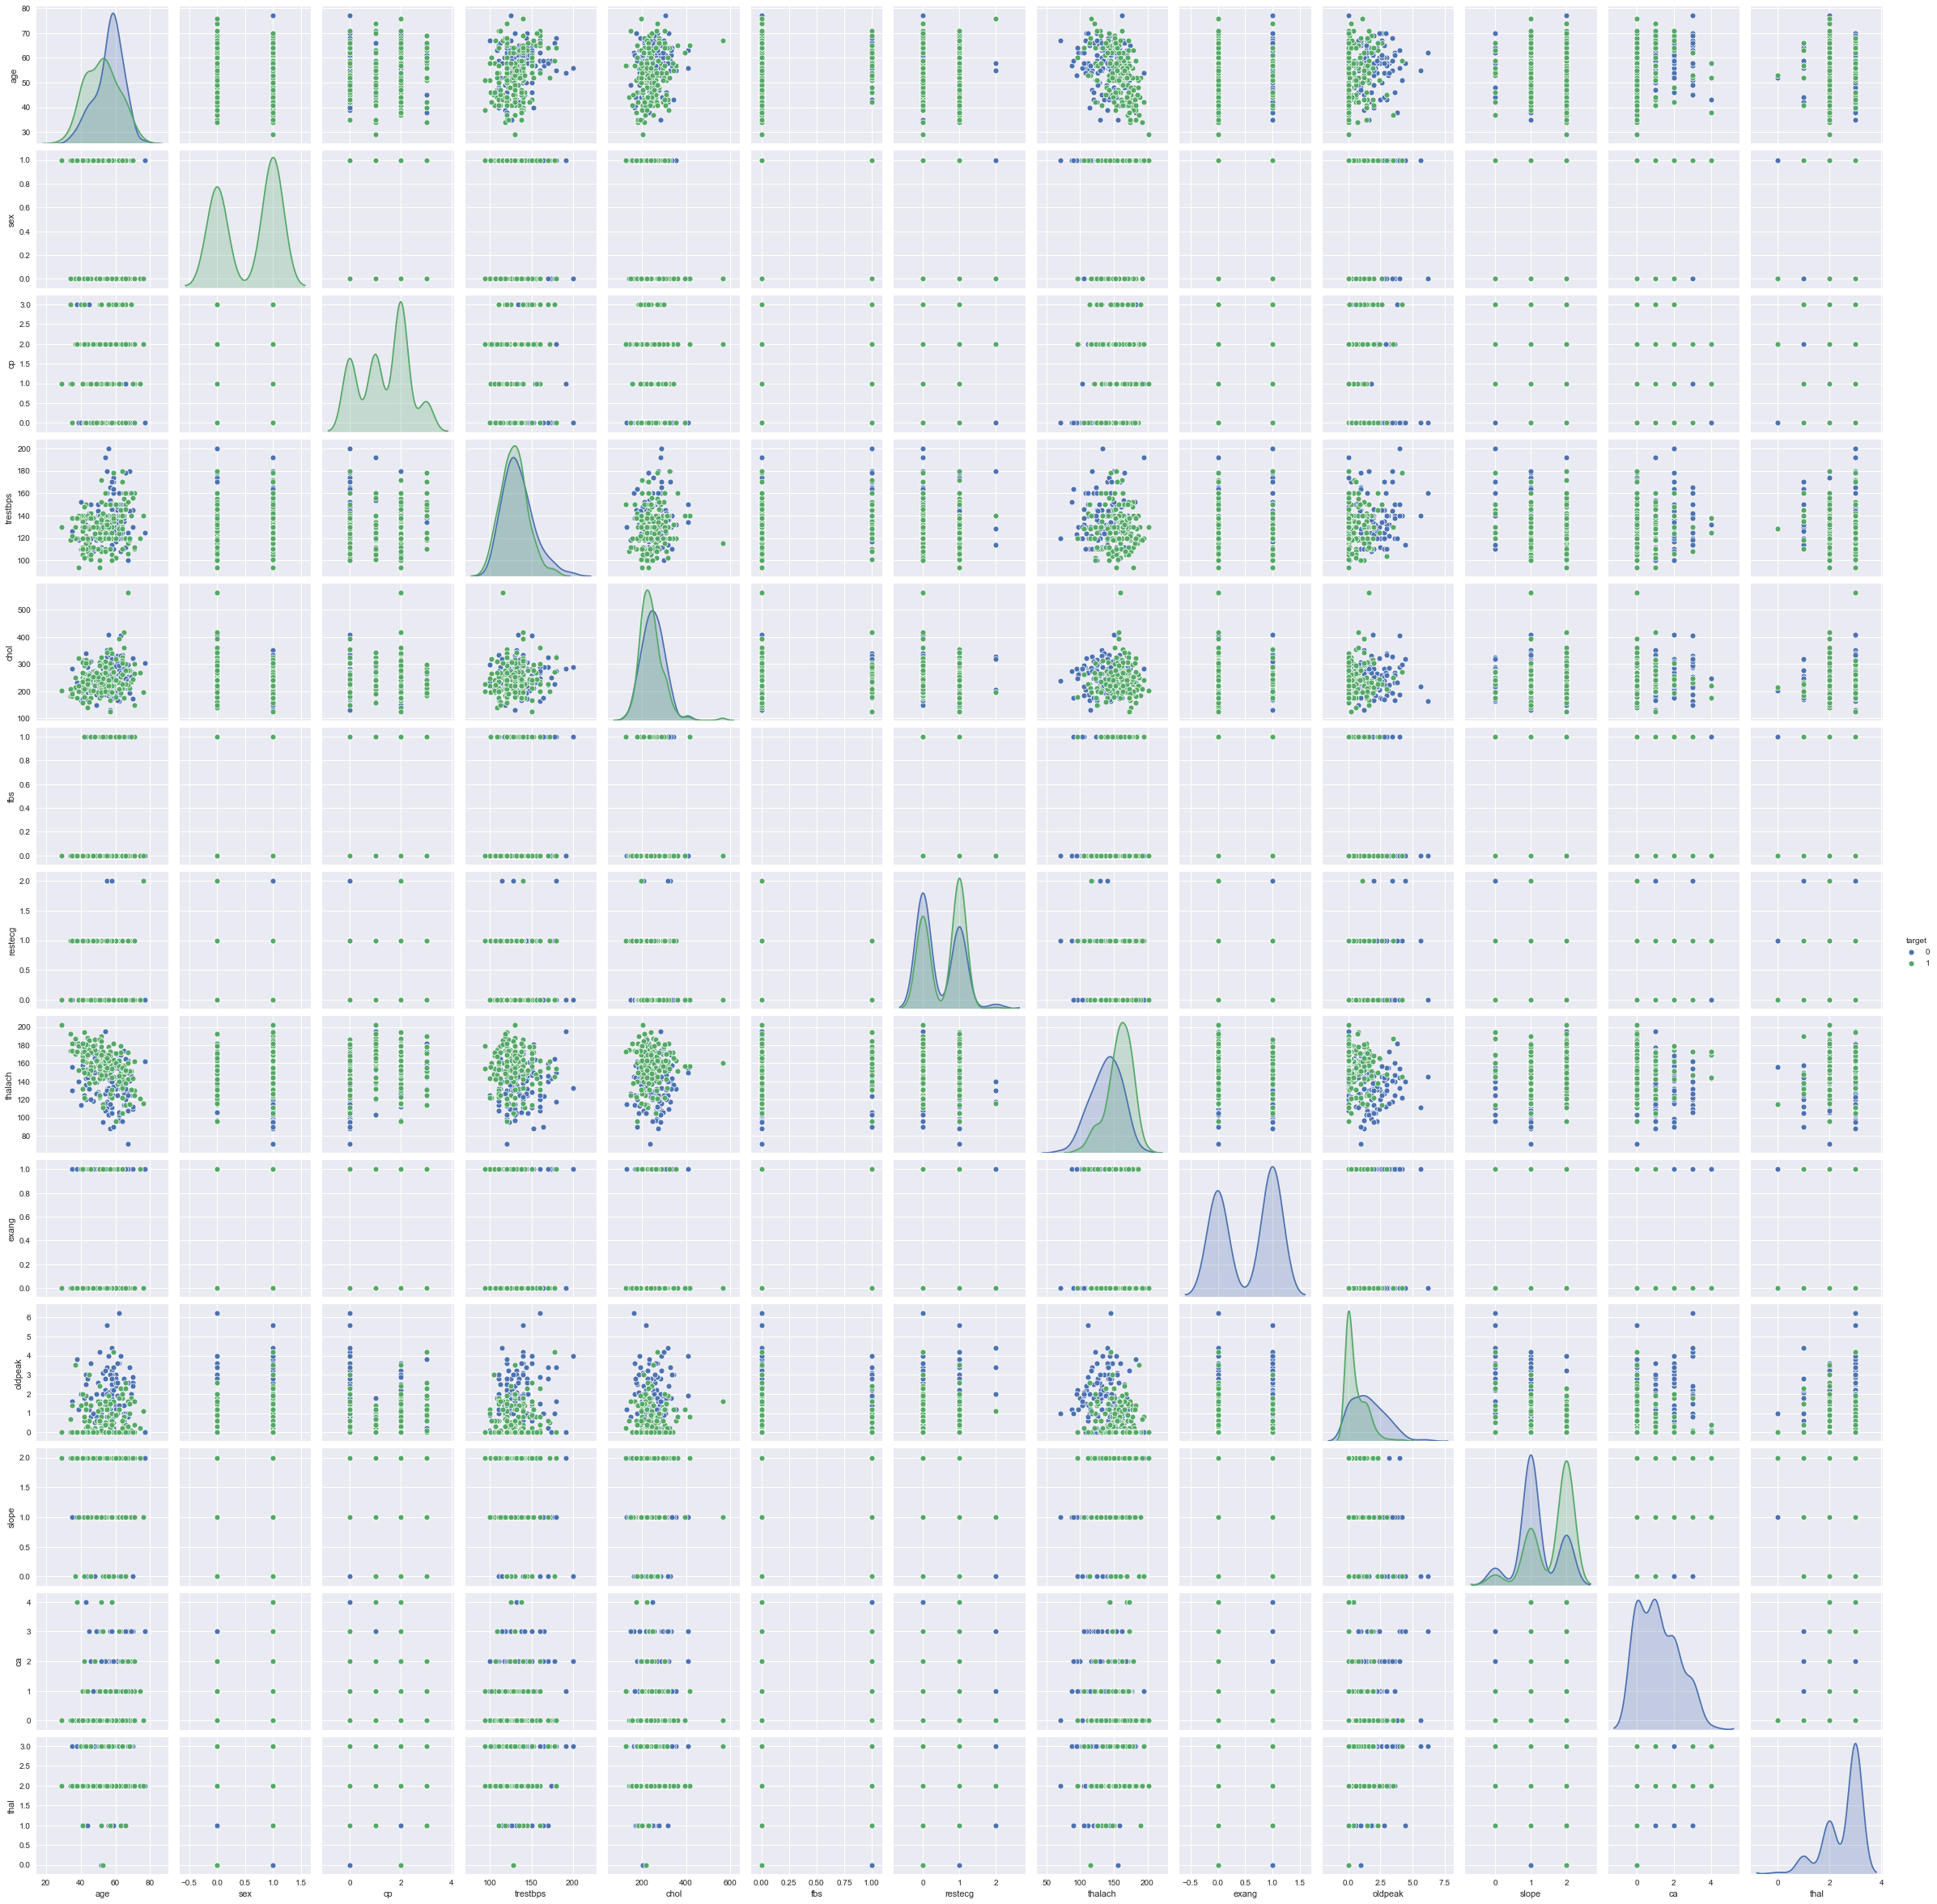

In [15]:
sns.pairplot(hue='target', data=df)
plt.show()

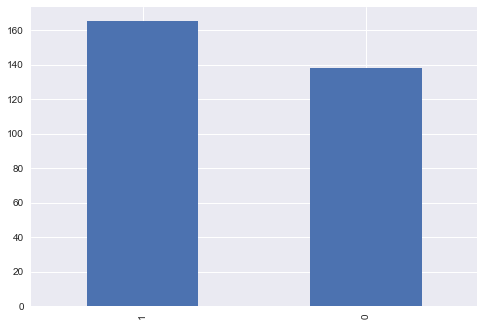

In [17]:
df['target'].value_counts().plot(kind='bar')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
scaler = StandardScaler()

In [23]:
X = df.drop('target', axis=1)
Y = df['target']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y)

In [25]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
x_train_norm = scaler.transform(x_train)

In [27]:
# BaseLine Model
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

In [29]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

In [34]:
y_pred_train = lr.predict(x_train_norm)

In [35]:
x_test_norm = scaler.transform(x_test)

In [36]:
y_pred = lr.predict(x_test_norm)

In [38]:
print('Training Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Training Accuracy:  0.8193832599118943
Test Accuracy:  0.8026315789473685


In [39]:
print('Test Recall: ', recall_score(y_test, y_pred))
print('Test Precision: ', precision_score(y_test, y_pred))

Test Recall:  0.7560975609756098
Test Precision:  0.8611111111111112


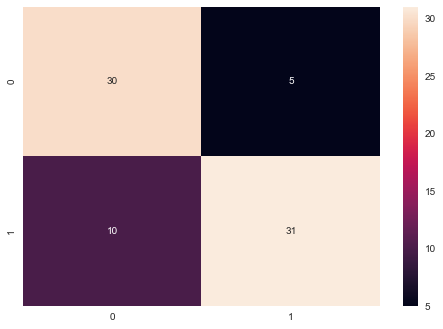

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)